<link rel="stylesheet" href="ipython.min.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Visualização de Dados
---

## Conteúdo

- Introdução
- Conjunto de Dados a Utilizar
- Visualização de relações entre variáveis:
    - Duas variáveis contínuas
    - Uma variáveis contínua e outra categórica
- Visualização da distribuição dos valores de variáveis
- Plots em pares
- Gráfico Interativo com Plotly

## Introdução

- Gerar visualizações informativas é uma das tarefas mais importantes em análise de dados;
- Essas visualizações são úteis para:
    - Identificar padrões visualmente;
    - Identificar valores discrepantes (*outliers*);
    - Identificar transformações necessárias nos dados;
    - Extrair conhecimento;
    - ...
- Mais atualmente algumas bibliotecas permitem construir visualizações interativas (geralmente chamadas dashboards):
    - https://plot.ly/python/dashboard/

## Bibliotecas em Python para Visualização de Dados

- **Matplotlib**
- **Seaborn**
- ggplot
- Bokeh
- Altair
- Plotly
- GeoplotLib
- ...

## Introdução à Biblioteca matplotlib

- A biblioteca `matplotlib` é um pacote de plotagem, criado para produzir gráficos similares aos produzidos em MATLAB dentro do Python.

- Sobre essa biblioteca foram criadas uma série de bibliotecas para visualização de dados, como o `seaborn`.

- Para importar essa biblioteca no Python usamos:
```python
import matplotlib.pyplot as plt
```

## Plotando uma linha simples

- Neste exemplo podemos visualizar uma linha simples. Os dados da variável `data` correspondem ao eixo $y$ e no eixo $x$ a biblioteca entende que queremos mostrar apenas um conjunto de valores em sequência.

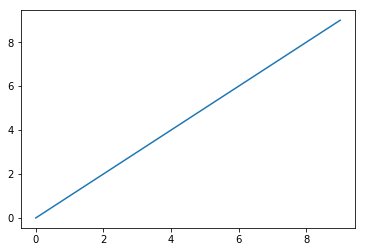

In [2]:
import matplotlib.pyplot as plt
import numpy as np
data1 = np.arange(10)
plt.plot(data1)

- Neste exemplo podemos ver alguns pontos de uma função quadrática.

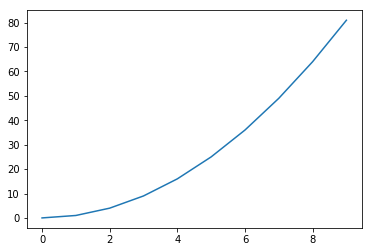

In [3]:
x =  np.arange(10)
y = x ** 2
plt.plot(x,y)

## Figuras e Subplotagens

- No `matplotlib` as figuras ficam armazenadas em um objeto `Figure`

- Neste objeto podemos definir o seu tamanho e também adicionar vários *subplots*.

- Depois disso podemos criar gráficos para cada *subplot* individualmente.

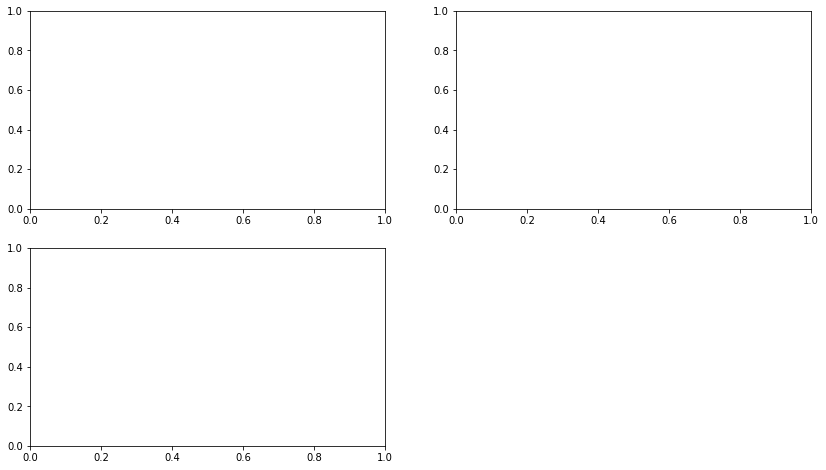

In [4]:
fig1 = plt.figure(figsize=(14,8))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

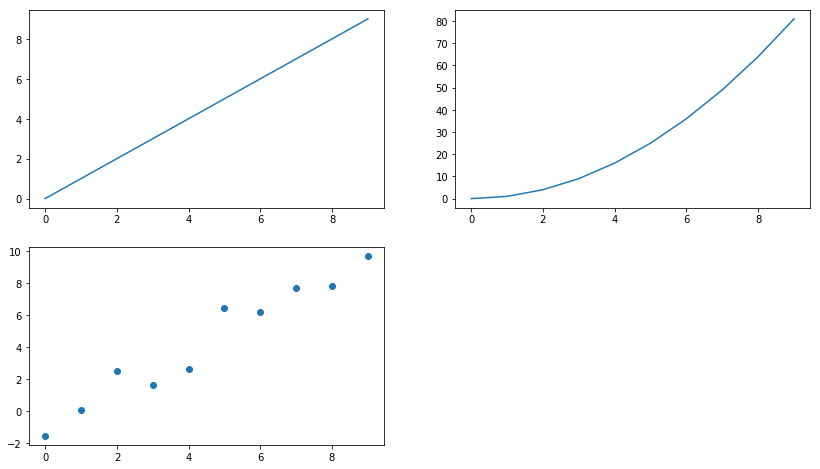

In [5]:
ax1.plot(data1)
ax2.plot(x,y)
ax3.scatter( x = np.arange(10), y = np.arange(10) + np.random.randn(10) )
fig1

- Utilização da função `subplots` para geração de subplots e indexação.

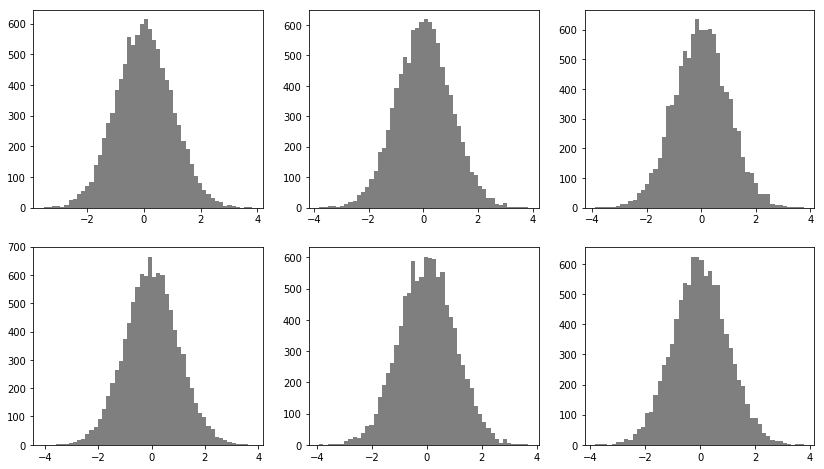

In [6]:
fig, axes = plt.subplots(2,3,figsize=(14,8))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].hist( np.random.randn(10000), bins=50, color='k', alpha = 0.5)

### Cores, marcadores e estilos de linha

- Esses elementos são muito importantes para diferenciar comportamentos ou diferentes conteúdos do gráfico.
- Podemos definir essas três características dos gráficos utilizando apenas um string ou definindo cara atributo na hora da plotagem.
- Por exemplo, para plotarmos um gráfico de linha tracejada, mostrando os pontos e de cor preta usamos a string 'ko--'.
    ```python
    plt.plot( randn(30).cumsum(), 'ko--')
    ```
- Também podemos mostrar o mesmo conteúdo utilizando os parâmetros da função.
    ```python
    plt.plot( randn(30).cumsum(), linestyle='--', color='k', marker = 'o')
    ```

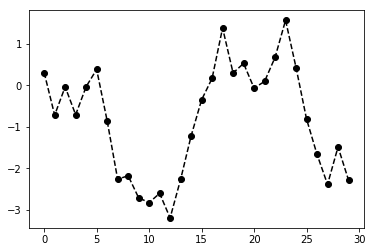

In [7]:
from numpy.random import randn
plt.plot( randn(30).cumsum(), 'ko--')

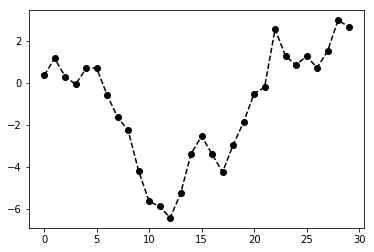

In [8]:
plt.plot( randn(30).cumsum(), linestyle='--', color='k', marker = 'o')

### Salvando Figuras em Arquivo

- Para salvar uma figura em arquivo usamos a função ```savefig```, que permite inferir baseado no nome do arquivo que colocarmos qual é o formato que desejamos salvar.

- Os formatos mais comuns são: pdf, svg e jpg.

In [9]:
fig.savefig('plots/histogramas.pdf')
fig.savefig('plots/histogramas.svg')
fig.savefig('plots/histogramas.jpg')

### Mais sobre ```matplotlib```

- No Capítulo 9 do livro *Python para Análise de Dados* encontramos mais algumas funcionalidades para plotar gráficos desta biblioteca.

- Existe uma extensa bibliografia sobre essa biblioteca e também muitos cursos. Visitem o site https://matplotlib.org/ e verifiquem o código fonte de alguns exemplos.

- Como já mencionado é a base para a implementação de muitas outras bibliotecas, como ```seaborn```.

### Biblioteca Seaborn

- Ao utilizar a biblioteca `seaborn` mudamos o estilo de cores e os estilos de plotagens originais do *matplotlib* para melhorar a estética e a legibilidade.

- Ao iniciar um projeto de visualização de dados usando `seaborn` fazemos a importaçao das seguintes bibliotecas:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```

- A partir desta biblioteca podemos gerar gráfico de *mais alto nível* de uma forma mais geral, sem se atentar tanto aos detalhes estéticos, embora precisamos saber como manipular certos detalhes do gráfico.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualização da relação entre Variáveis

- Quando estamos estudando um conjunto de dados é bem comum que tenhamos que entender a relação entre as variáveis.
- A maior parte dos conjuntos de dados possuem muitas instâncias (exemplos) e nem sempre é possível visualizar dados no formato de tabelas para mostrar ao usuário a relação entre variáveis.
- Visualizar apropriadamente os dados permite entender, por exemplo, relaçoes de correlação entre dados.

### Conjunto de Dados `Tips` (gorjetas)

In [11]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
with pd.option_context('display.max_rows',10):
    display(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Descrição textual dos dados

`total_bill` é valor total da conta (em dólares), incluíndo taxas

`tip` é valor da gorjeta (em dólares)

`sex` é o sexo de quem pagou a conta

`smoker` identifica se quem pagou a conta fumava ou não

`day` identifica o dia da semana

`time` identifica se ocorreu ao meiodia ou a noite

`size` é o número de participantes da mesa


### Descrição dos tipos de dados de cada coluna

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Descrição de Variáveis Numéricas (contínuas e discretas) por Estatísticas Descritivas.

In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Relação entre duas variáveis contínuas

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para visualizar a relação entre duas variáveis contínuas podemos utilizar a função `relplot()`.

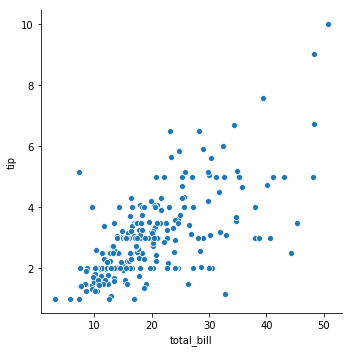

In [16]:
sns.relplot(x="total_bill", y="tip", data=df)

- Com uma variável categórica podemos colorir os pontos de acordo com sua categoria. Por exemplo, podemos usar a a variável `sex`

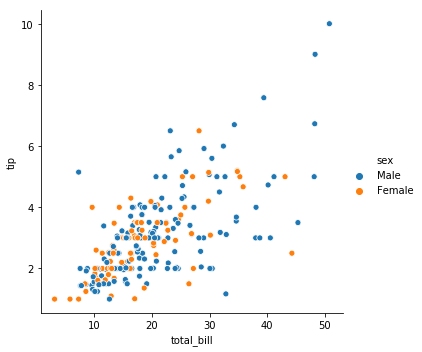

In [17]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=df)

- Também podemos usar uma variável categórica para mudar o estilo dos pontos de acordo com sua categoria. Por exemplo, podemos usar a variável `smoker`.

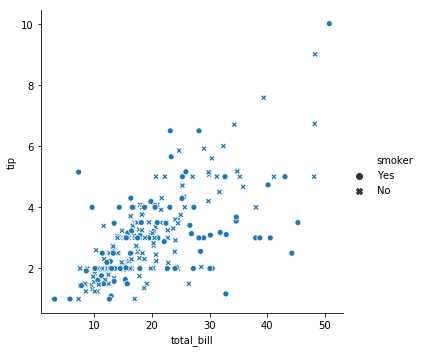

In [18]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=df)

- E ainda podemos combinar ambos: a cor e o estilo.

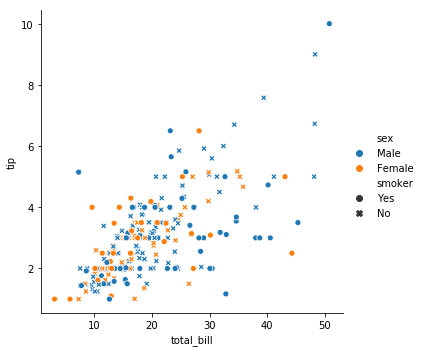

In [19]:
sns.relplot(x="total_bill", y="tip", hue="sex", style="smoker", data=df)

- O tamanho dos pontos também pode ser uma característica importante e geralmente está ligada a uma variável que apresente alguma quantidade, uma variável numérica discreta, por exemplo, a variável `size`

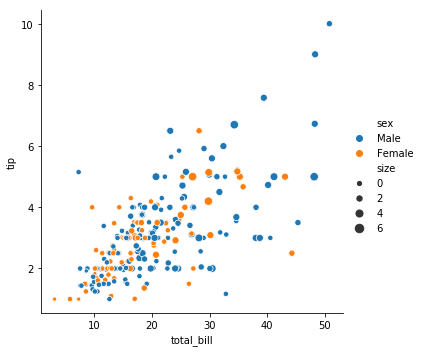

In [20]:
sns.relplot(x="total_bill", y="tip", hue="sex", size="size", data=df)

- A faixa de valores de size pode também ser alterada para outro intervalo, por exemplo, 10 a 50.

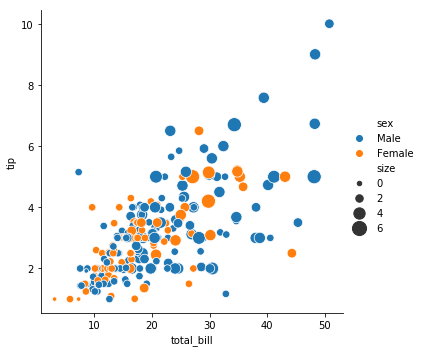

In [21]:
sns.relplot(x="total_bill", y="tip", hue="sex", size="size", sizes = (20,200), data=df)

### Relação entre uma variável categórica e uma contínua

- Para visualizar a relação entre duas variáveis contínuas podemos utilizar a função `catplot()`. Neste tipo de visualização é definida automaticamenteu uma cor para cada valor no eixo $x$.

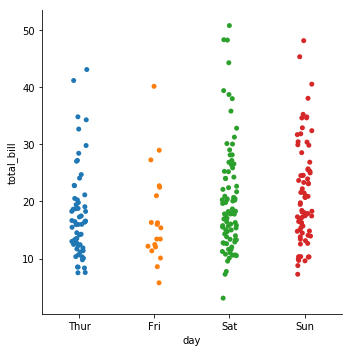

In [22]:
sns.catplot(x="day", y="total_bill", data=df);

- Na visualização anterior é foi aplicado um `jitter=True` automaticamente. Para remover esse valor aleatório ao redor dos pontos podemos mostrar o gráfico da seguinte forma, onde os pontos ficarão superpostos.

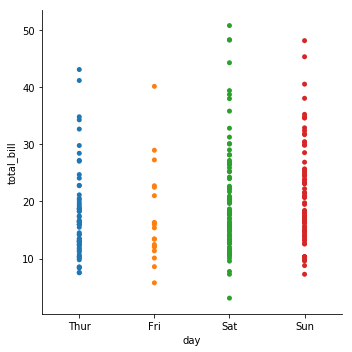

In [23]:
sns.catplot(x="day", y="total_bill", jitter = False, data=df);

- Para resolver isso podemos utilizar uma visualização que resolva o problema da superposição de pontos, denominada de *overlapping*.

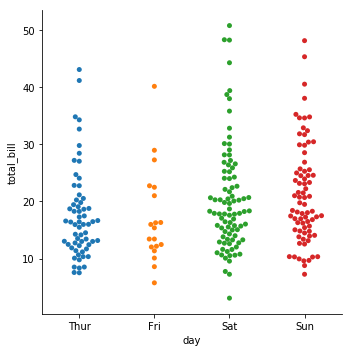

In [24]:
sns.catplot(x="day", y="total_bill", kind='swarm', data=df);

- Já que o eixo $x$ representa os diferentes valores da variável discreta que queremos relacionar no eixo, ao utilizar a cor para respresentar a mesma coisa podemos estar deixando de aproveitar a oportunidade de usar a cor para visualizar uma nova dimensão.

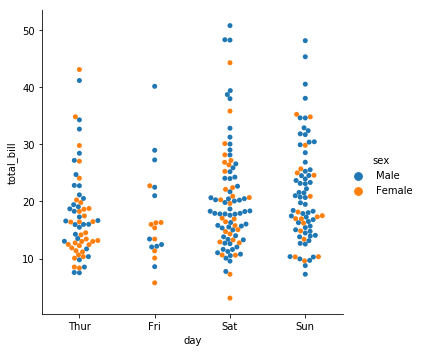

In [25]:
sns.catplot(x="day", y="total_bill", hue = 'sex', kind='swarm', data=df);

- Como nosso conjunto de dados é um DataFrame podemos visualizar um subconjunto de dados baseado em alguma *query*. Por exemplo, se queremos visualizar a distribuição do valor das contas de acordo com o número de pessoas da mesa, para aqueles grupos com pelo menos 4 pessoas, podemos fazer da seguinte forma.

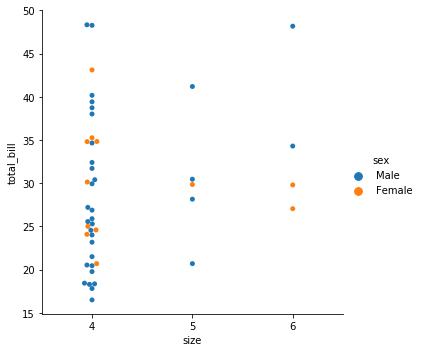

In [26]:
sns.catplot(x="size", y="total_bill", hue = 'sex', kind='swarm', data=df.query('size >= 4'));

- Quando queremos visualizar as categorias no eixo $y$ e os valores no eixo $x$, apenas trocamos os valores dessas variáveis no gráficos. Utilizar o atributo 'orient' do gráfico não traz o resultado desejado quando temos uam variável discreta e outra numérica.

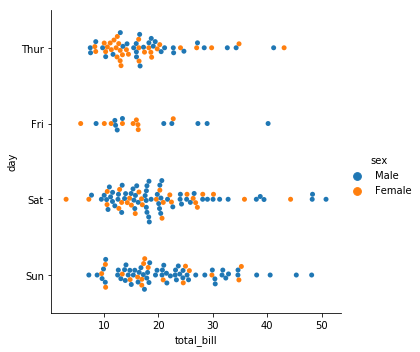

In [27]:
sns.catplot(x="total_bill", y="day", hue = 'sex', kind='swarm', data=df);

#### Diagrama de Caixas ou Boxplot

- Este gráfico mostra a distribuição dos valores da variável numérica para cada valor da variável categórica.

- A caixa representa o intervalo interquartil ou interquartílico (IQR) linha dentro da caixa representa a mediana (segundo quartil). Por este gráfico valores fora dos bigodes (*whiskers*) são considerados outliers.

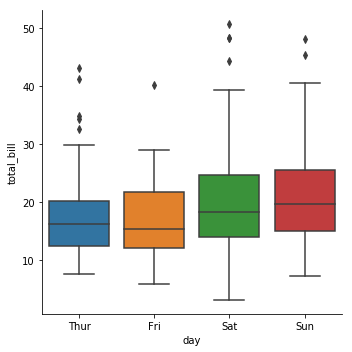

In [28]:
sns.catplot(x="day", y="total_bill", kind="box", data=df);

- Esta visualização também permite ver boxplots lado a lado ao utilizamos uma categoria discreta para a tonalidade (cor) das caixas do gráfico.

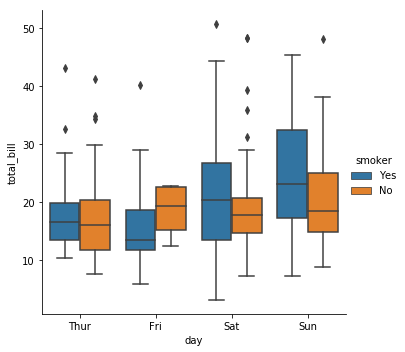

In [29]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=df);

#### Gráfico de Barras

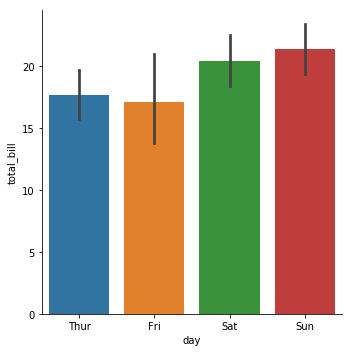

In [30]:
sns.catplot(x="day", y="total_bill", kind="bar", data=df);

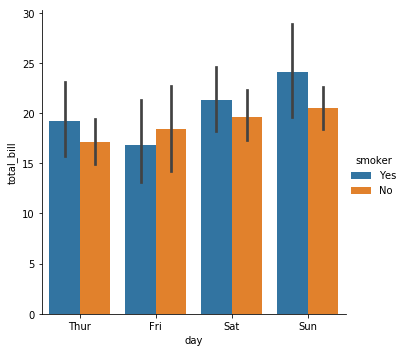

In [31]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="bar", data=df);

#### Gráfico de Médias

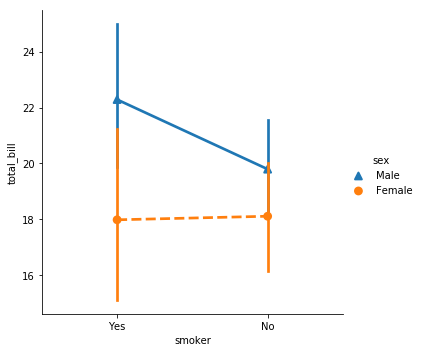

In [32]:
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="point",  markers=["^", "o"], linestyles=["-", "--"], data=df);

#### Usando Facets

- A utilização de *Facets* permite dividir os dados em múltiplos gráficos. No exemplo abaixo, separamos os dados usando a variável categórica de `time`.

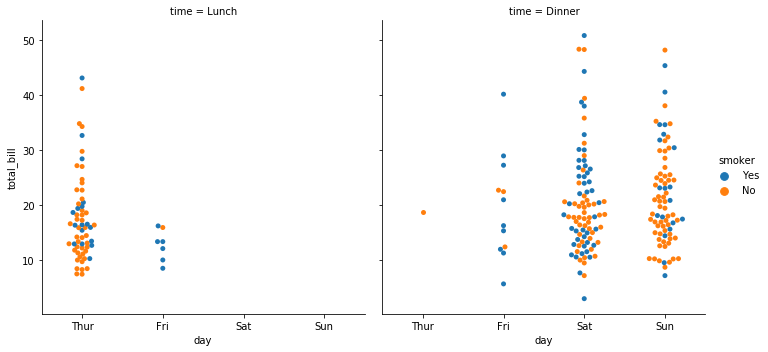

In [33]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", kind="swarm", data=df);

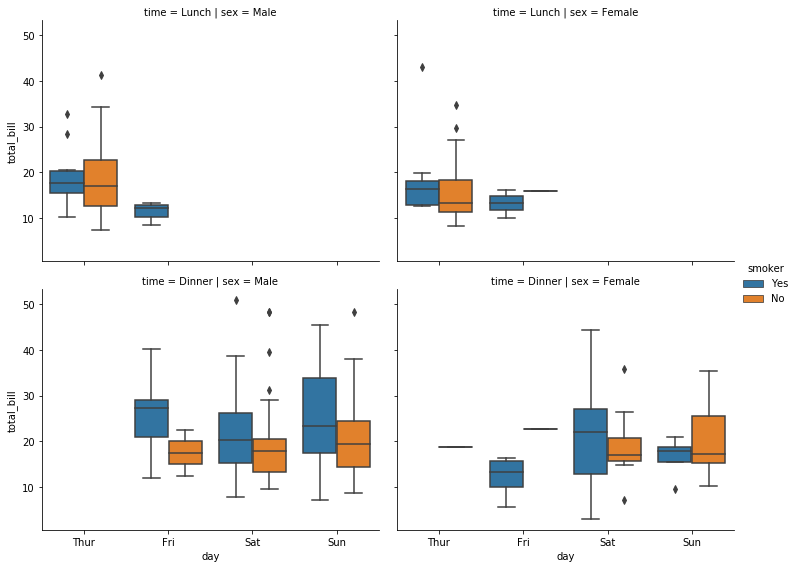

In [34]:
sns.catplot(x="day", y="total_bill", hue="smoker", row="time", col = 'sex', kind="box", aspect=1.3, height = 4, data=df );

# Visualização da distribuição dos valores de variáveis

#### Histograma e Função de Densidade

No exemplo abaixo verificamos a distribuição de 100 valores escolhidos aleatoriamente de uma distribuição normal com média zero e desvio padrão um.

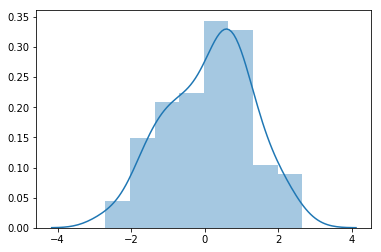

In [35]:
x1 = np.random.normal(size=100)
sns.distplot(x1);

Neste exemplo geramos três vetores de dados também gerados de uma distribuição normal, mas variando o número de valores gerados. Veja que à medida que geramos mais números nossa distribuição se assemelha cada vez mais a uma distribuição normal.

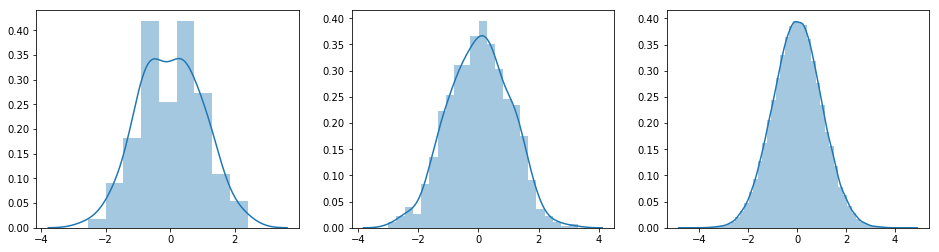

In [76]:
x2 = np.random.normal(size=100)
x3 = np.random.normal(size=1000)
x5 = np.random.normal(size=100000)

fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.distplot(x2, ax=ax[0]);
sns.distplot(x3, ax=ax[1]);
sns.distplot(x5, ax=ax[2]);

[(0, 20)]

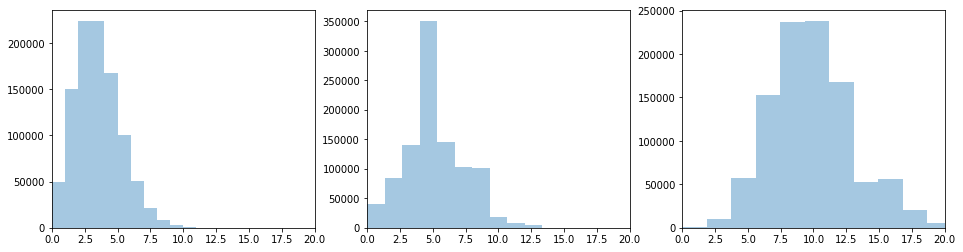

In [75]:
x2 = np.random.poisson(3,size=1000000)
x3 = np.random.poisson(5,size=1000000)
x5 = np.random.poisson(10,size=1000000)

fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.distplot(x2, ax=ax[0], bins = 15, kde=False).set(xlim=(0, 20))
sns.distplot(x3, ax=ax[1], bins = 15, kde=False).set(xlim=(0, 20))
sns.distplot(x5, ax=ax[2], bins = 15, kde=False).set(xlim=(0, 20))

### Gráfico de Densidade

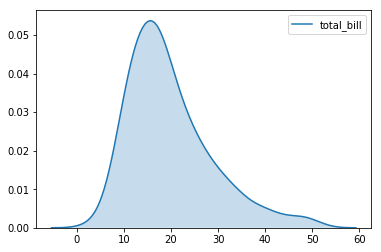

In [38]:
sns.kdeplot(df.total_bill, shade = True)

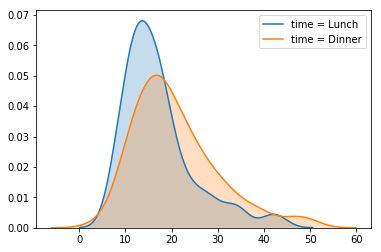

In [39]:
sns.kdeplot(df.query('time == "Lunch"').total_bill, shade = True, label = 'time = Lunch')
sns.kdeplot(df.query('time == "Dinner"').total_bill, shade = True, label = 'time = Dinner')

### Gráfico de Densidade para Duas Variáveis

Neste gráfico podemos ver o gráfico de dispersão (*scatter plot*) e junto com isso vemos o histograma de distribuição em cada eixo.

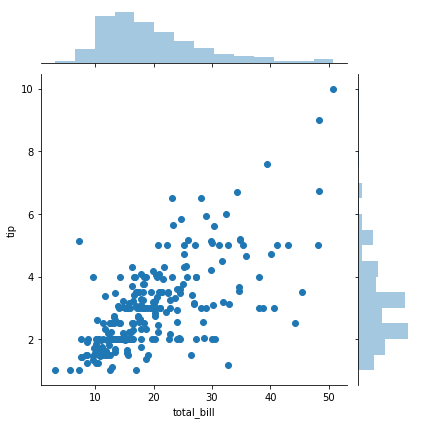

In [40]:
sns.jointplot(x='total_bill', y='tip', data=df)

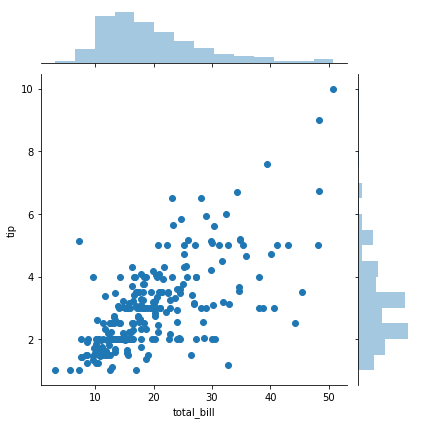

In [41]:
sns.jointplot(x='total_bill', y='tip', data=df)

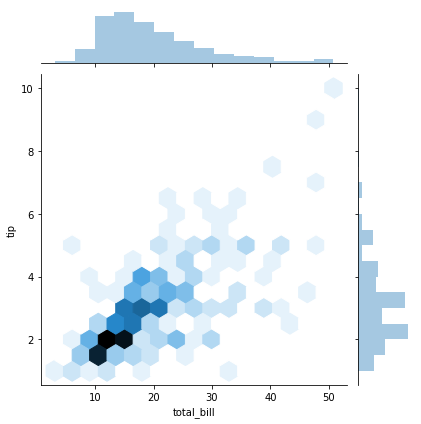

In [42]:
sns.jointplot(x='total_bill', y='tip', data=df, kind="hex")

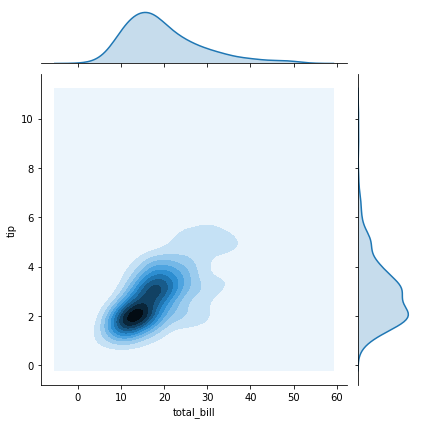

In [43]:
sns.jointplot(x='total_bill', y='tip', data=df, kind="kde")

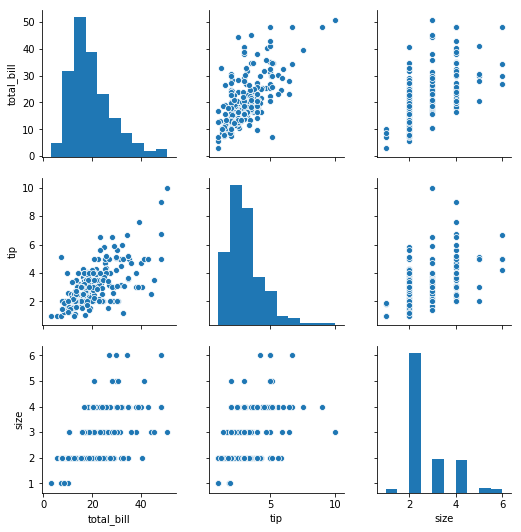

In [44]:
sns.pairplot(df);

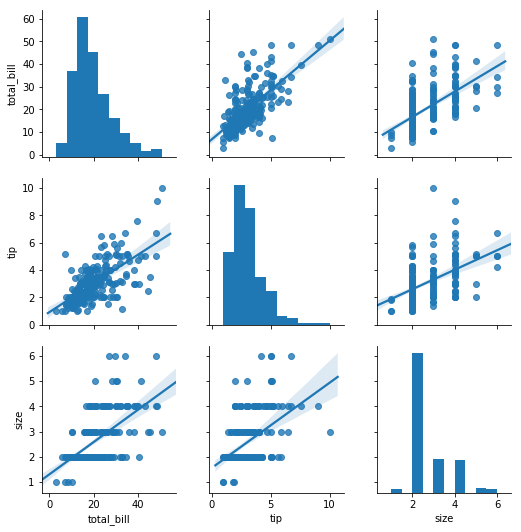

In [45]:
sns.pairplot(df, kind="reg");

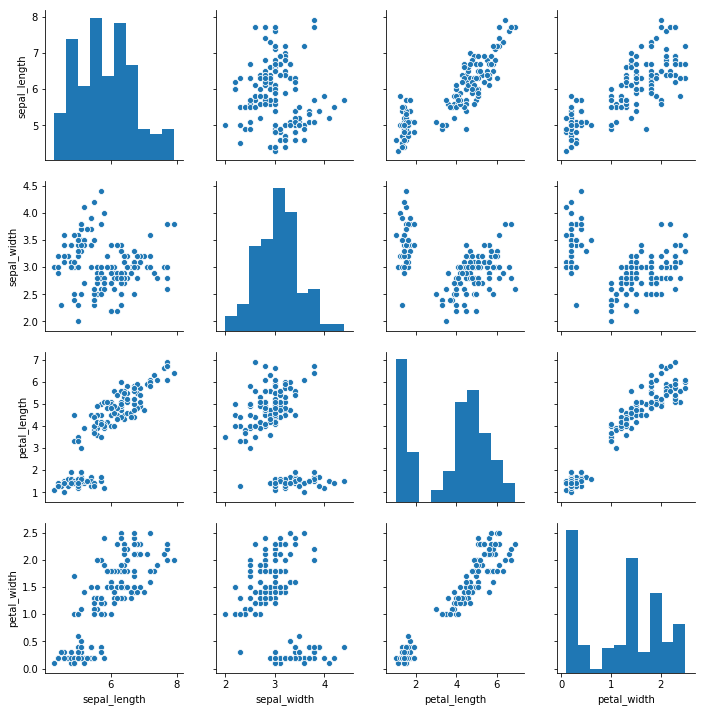

In [46]:
df_iris = sns.load_dataset('iris')
sns.pairplot(df_iris);

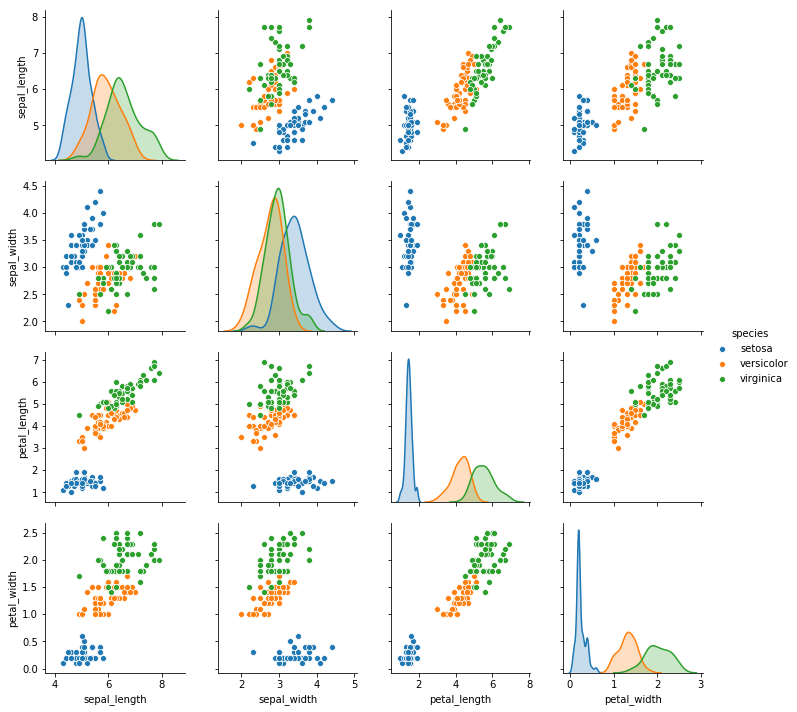

In [47]:
sns.pairplot(df_iris, hue="species")

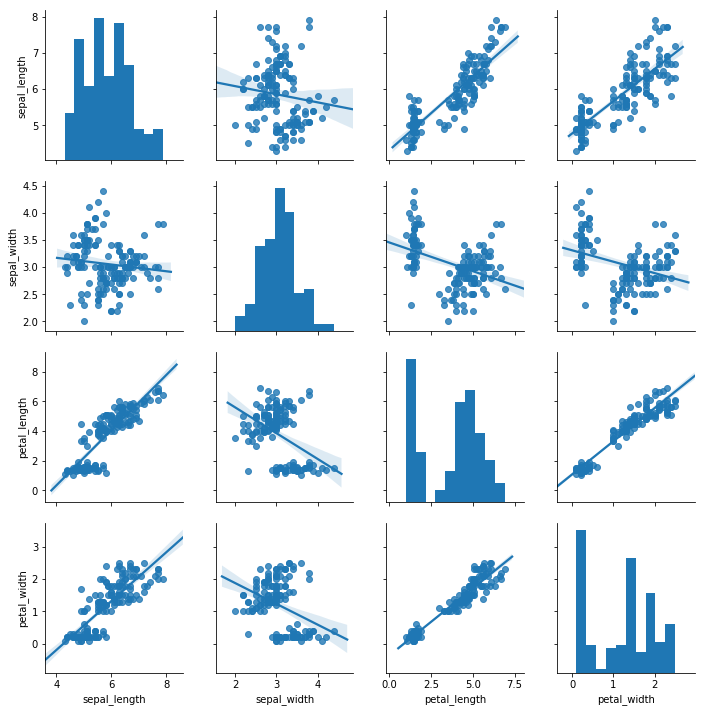

In [48]:
sns.pairplot(df_iris, kind="reg")

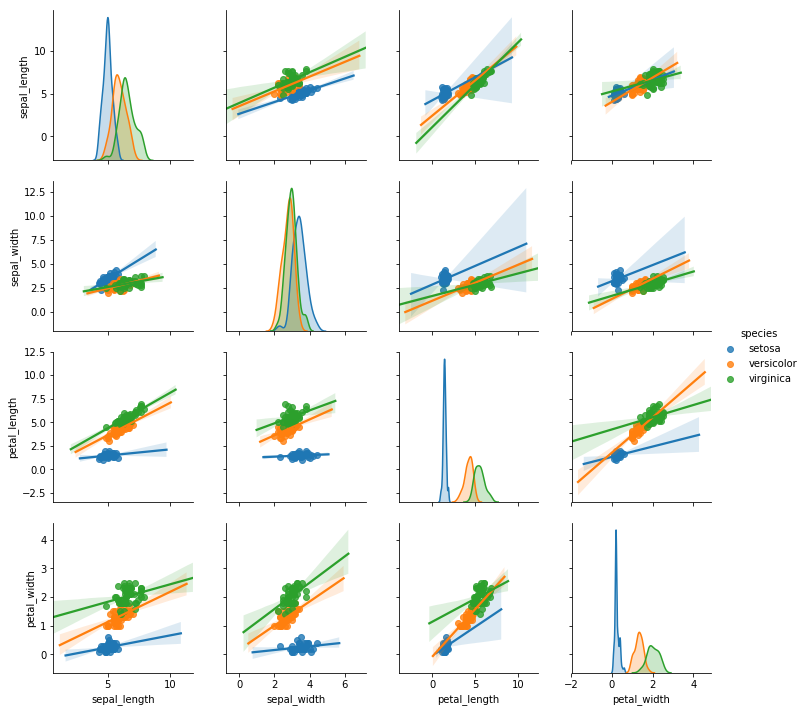

In [49]:
sns.pairplot(df_iris, hue="species", kind="reg")

# Gráfico Interativo com Plotly

In [77]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='AndresFerrero', api_key='VnbF1ikryivX9H7dpJos')

In [78]:
fig = ff.create_facet_grid(df, x='total_bill', y='tip', color_name='sex' )
py.iplot(fig, filename='tips')

C:\Users\andres\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Atividade

- Explorar os conjuntos de dados `iris` e `titanic` ambos dentro da biblioteca `seaborn`

- Para cada conjunto de dados criar:
    - Uma visualização apropriada para cada variável.
    - Cinco visualizações que mostrem a relação entre duas variáveis nos eixos e utilizem mais uma variável categórica para a cor ou o estilo.
    - Três visualizações que utilizem fatoração de uma variável categórica para separar os graficos, usando `facets`.
    - Dois modelos de `pairplot` para o dataset `iris`.    
    - Um gráfico interativo utilizando `plotly`.
    
- Pesquisara na Internet (pode ser na plataforma Kaggle) algum dataset e treinar a visualização de dados usando as técnicas utilizadas nesta aula.

In [83]:
df_iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [84]:
df_iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650
